<a href="https://colab.research.google.com/github/SubhasmitaSw/Social-Distancing-Detector/blob/main/Social_Distance_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#APPROACH

###DETECTION
(INITIAL) Pedestrian Detection from sample video
The model used for detection is <a href="https://tfhub.dev/tensorflow/ssd_mobilenet_v2/1">ssd_mobilenet_v2_coco_2018_01_28</a> which was trained on MSCOCO 2017 dataset. 

Reference: <a href="https://applsci-10-07514-v2.pdf
https://towardsdatascience.com/measuring-social-distance-in-the-time-of-covid-19-da0503717a62">Measuring Social Distance</a>

Detection from real-time video feeds
For the real-time detection on NVIDIA Jetson Nano with pi-cam/web-cam the we will use a variation in YOLO arcitechture i.e Tiny-YOLO

The Tiny-YOLO architecture is approximately 442% faster than it’s larger big brothers, achieving upwards of 244 FPS on a single GPU.

Reference:<a href="https://www.pyimagesearch.com/2020/01/27/yolo-and-tiny-yolo-object-detection-on-the-raspberry-pi-and-movidius-ncs/">TinyYOLO</a>



---

# Process



<img src="https://miro.medium.com/max/3112/1*4zKiSkLDXgT0ubohPp3bgQ.png" alt="flowchart" width="800px"/>


---

#Distance Calculation and Violation Determination

**Distance Measurement Algorithm** 

![eucl_dist image](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTN0bdLVzY55xa2uRttKoCYh3Vj2fYI5t9GKA&usqp=CAU)

*Measuring Distance Between Pedestrians*
The algorithm used for distance measurement between two adjacent pedestrians is <a href="https://machinelearningmastery.com/distance-measures-for-machine-learning/#:~:text=A%20distance%20measure%20is%20an,objects%20in%20a%20problem%20domain.&text=Another%20unsupervised%20learning%20algorithm%20that,the%20K%2Dmeans%20clustering%20algorithm.">Euclidean Distance</a>


Euclidean distance calculates the distance between two real-valued vectors(ie. in our case it is every possible pair) nand help pair and determine which pair(s) crosses the limit devised optimal for social distancing(ie.6feet).

 This can be easily achieved by utilizing the fast and advanced python libraries - numpy and scipy.




Description
---

Using <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.euclidean.html">SciPyApi<a/>

**scipy.spatial.distance.euclidean**(u, v, w=None)

   * Computes the Euclidean distance between two 1-D arrays.

   *The Euclidean distance between 1-D arrays u and v, is defined as

![func](https://d2nchlq0f2u6vy.cloudfront.net/20/09/17/ff630475b7738f6739da252898cf9fda/17e721f5b00e92fc9f3284ab572a38f0/lateximg.png?tcb=1608983959)



Parameters
---
* u: (N,) array_like
Input array.

* v: (N,) array_like Input array.

* w: (N,) array_like, optional

The weights for each value in u and v. Default is None, which gives each value a weight of 1.0

Returns
---
euclidean: double

The Euclidean distance between vectors u and v.

Snippet
---
*Note: It is just for reference Not the actual parameters  

![code](https://bigdata-madesimple.com/wp-content/uploads/2015/06/code-1.png)

---
For more Info: 
- <a href="https://machinelearningmastery.com/distance-measures-for-machine-learning/#:~:text=A%20distance%20measure%20is%20an,objects%20in%20a%20problem%20domain.&text=Another%20unsupervised%20learning%20algorithm%20that,the%20K%2Dmeans%20clustering%20algorithm.">Distance Measurement Algoithms</a>

- <a href="https://docs.scipy.org/doc/scipy/reference/spatial.distance.html">Distance Computations</a>

---

###Measuring Distance between Centroids of bounding boxes


* Step1 Measuring Distance
<img src="https://miro.medium.com/max/875/1*nV749oNHAeKWowUrSBsO3w.jpeg" width="400px">

* Step2 Permutation Between Centroids
<img src="https://miro.medium.com/max/625/1*ofphZZWhUjTYOAoQG88DTA.jpeg" width="400px">



---
Reference: <a href="https://towardsdatascience.com/measuring-social-distance-in-the-time-of-covid-19-da0503717a62">Measuring Social Distance</a>

In [ ]:
#@title Load Drive
from google.colab import drive

drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
%cd /gdrive/'My Drive'/Projects/Pedestrian_Detection/models/research/

/gdrive/My Drive/Projects/Pedestrian_Detection/models/research


In [ ]:
#@title Few Requirements
!apt-get install -qq protobuf-compiler python-pil python-lxml python-tk
!pip install -qq Cython contextlib2 pillow lxml matplotlib pycocotools
!pip install tf-slim
!pip install numpy==1.17.0

In [ ]:
!pwd
!protoc object_detection/protos/*.proto --python_out=.

In [ ]:
#@title Setup
import os
os.environ['PYTHONPATH'] += '/gdrive/My Drive/Projects/Pedestrian_Detection/models/research/:/gdrive/My Drive/Projects/Pedestrian_Detection/models/research/slim/'

!python setup.py build
!python setup.py install

In [ ]:
#@title Download the model

!mkdir /gdrive/'My Drive'/Projects/Pedestrian_Detection/models/research/pretrained_model
%cd /gdrive/'My Drive'/Projects/Pedestrian_Detection/models/research/pretrained_model

!wget http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_coco_2018_03_29.tar.gz
!tar -xzf ssd_mobilenet_v2_coco_2018_03_29.tar.gz -C .

%cd /gdrive/'My Drive'/Projects/Pedestrian_Detection/models/research/

In [ ]:
#@title Importintg Necessary Libraries
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

if StrictVersion(tf.__version__) < StrictVersion('1.9.0'):
  raise ImportError('Please upgrade your TensorFlow installation to v1.9.* or later!')
  
# This is needed to display the images.
%matplotlib inline


from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

import math
import itertools
from itertools import compress
from PIL import Image, ImageDraw



In [ ]:
#@title Load Model
#@markdown Model Name- 'ssd_mobilenet_v2'

# Model Name
MODEL_NAME = 'ssd_mobilenet_v2_coco_2018_03_29'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_FROZEN_GRAPH = "/gdrive/My Drive/Projects/Pedestrian_Detection/models/research/pretrained_model/ssd_mobilenet_v2_coco_2018_03_29/frozen_inference_graph.pb"

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = '/gdrive/My Drive/Projects/Pedestrian_Detection/models/research/object_detection/data/mscoco_label_map.pbtxt'

# Load graph
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.compat.v1.GraphDef()
  with tf.compat.v2.io.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

In [ ]:
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)


In [ ]:
#@title Inference on frames(ie. single images)
def run_inference_for_single_image(image, graph):
  with graph.as_default():
    with tf.Session() as sess:
      # Get handles to input and output tensors
      ops = tf.get_default_graph().get_operations()
      all_tensor_names = {output.name for op in ops for output in op.outputs}
      tensor_dict = {}
      for key in [
          'num_detections', 'detection_boxes', 'detection_scores',
          'detection_classes', 'detection_masks'
      ]:
        tensor_name = key + ':0'
        if tensor_name in all_tensor_names:
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
              tensor_name)
      if 'detection_masks' in tensor_dict:
        # The following processing is only for single image
        detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
        detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
        # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
        real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
        detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
        detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes, image.shape[0], image.shape[1])
        detection_masks_reframed = tf.cast(
            tf.greater(detection_masks_reframed, 0.5), tf.uint8)
        # Follow the convention by adding back the batch dimension
        tensor_dict['detection_masks'] = tf.expand_dims(
            detection_masks_reframed, 0)
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

      # Run inference
      output_dict = sess.run(tensor_dict,
                             feed_dict={image_tensor: np.expand_dims(image, 0)})

      # all outputs are float32 numpy arrays, so convert types as appropriate
      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict[
          'detection_classes'][0].astype(np.uint8)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
      if 'detection_masks' in output_dict:
        output_dict['detection_masks'] = output_dict['detection_masks'][0]
  return output_dict

In [ ]:
#@title Utility Functions
#helper code
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)


def filter_boxes(min_score, boxes, scores, classes, categories):
  """Return boxes with a confidence >= `min_score`"""
  n = len(classes)
  idxs = []
  for i in range(n):
      if classes[i] in categories and scores[i] >= min_score:
          idxs.append(i)
  
  filtered_boxes = boxes[idxs, ...]
  filtered_scores = scores[idxs, ...]
  filtered_classes = classes[idxs, ...]
  return filtered_boxes, filtered_scores, filtered_classes

def calculate_coord(bbox, width, height):
  """Return boxes coordinates"""
  xmin = bbox[1] * width
  ymin = bbox[0] * height
  xmax = bbox[3] * width
  ymax = bbox[2] * height

  return [xmin, ymin, xmax - xmin, ymax - ymin]
    
def calculate_centr(coord):
  """Calculate centroid for each box"""
  return (coord[0]+(coord[2]/2), coord[1]+(coord[3]/2))
  
def calculate_centr_distances(centroid_1, centroid_2):
  """Calculate the distance between 2 centroids"""
  return  math.sqrt((centroid_2[0]-centroid_1[0])**2 + (centroid_2[1]-centroid_1[1])**2)
  
def calculate_perm(centroids):
  """Return all combinations of centroids"""
  permutations = []
  for current_permutation in itertools.permutations(centroids, 2):
    if current_permutation[::-1] not in permutations:
      permutations.append(current_permutation)
  return permutations
  
def midpoint(p1, p2):
  """Midpoint between 2 points"""
  return ((p1[0] + p2[0])/2, (p1[1] + p2[1])/2)
    
def calculate_slope(x1, y1, x2, y2):
  """Calculate slope"""
  m = (y2-y1)/(x2-x1)
  return m

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [ ]:
#@title Driver Code
#@markdown Applying all the utility functions to detect pedestrians and annotate bounding boxes along with alerting distance from each person.
import cv2
import matplotlib
import matplotlib.patches as patches
from matplotlib import pyplot as plt
from random import randrange

plt.ioff()
matplotlib.use('Agg')

FILE_OUTPUT = '/gdrive/My Drive/Projects/Pedestrian_Detection/models/research/test_images/output.mp4'

# Playing video from file
cap = cv2.VideoCapture('/gdrive/My Drive/Projects/Pedestrian_Detection/models/research/test_images/pedestrians.mp4')

# Default resolutions of the frame are obtained.The default resolutions are system dependent.
# We convert the resolutions from float to integer.
width = int(cap.get(3))
height = int(cap.get(4))

dim = (width, height)
print(dim)

tope = 10
i = 0
new = True
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        # Definite input and output Tensors for detection_graph
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')

        # Each box represents a part of the image where a particular object was detected.
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')

        # Each score represent how level of confidence for each of the objects.
        # Score is shown on the result image, together with the class label.
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')

        i = 0
        while(cap.isOpened()):
            # Capture frame-by-frame
            ret, frame = cap.read()
            
            if ret == True:
              # Correct color
              frame = gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

              # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
              image_np_expanded = np.expand_dims(frame, axis=0)

              # Actual detection.
              (boxes, scores, classes, num) = sess.run(
                  [detection_boxes, detection_scores, detection_classes, num_detections],
                  feed_dict={image_tensor: image_np_expanded})
              
              # Filter boxes
              confidence_cutoff = 0.5
              boxes, scores, classes = filter_boxes(confidence_cutoff, np.squeeze(boxes), np.squeeze(scores), np.squeeze(classes), [1])

              # Calculate normalized coordinates for boxes
              centroids = []
              coordinates = []
              for box in boxes:
                coord = calculate_coord(box, width, height)
                centr = calculate_centr(coord)
                centroids.append(centr)
                coordinates.append(coord)

              # Pixel per meters
              average_px_meter = (width-150) / 7

              permutations = calculate_perm(centroids)

              # Display boxes and centroids
              fig, ax = plt.subplots(figsize = (20,12), dpi = 90, frameon=False)
              ax = fig.add_axes([0, 0, 1, 1])
              ax.axis('off')
              ax.spines['top'].set_visible(False)
              ax.spines['right'].set_visible(False)
              ax.spines['bottom'].set_visible(False)
              ax.spines['left'].set_visible(False)
              ax.get_xaxis().set_ticks([])
              ax.get_yaxis().set_ticks([])
              for coord, centr in zip(coordinates, centroids):
                ax.add_patch(patches.Rectangle((coord[0], coord[1]), coord[2], coord[3], linewidth=2, edgecolor='y', facecolor='none', zorder=10))
                ax.add_patch(patches.Circle((centr[0], centr[1]), 3, color='yellow', zorder=20))

              # Display lines between centroids
              for perm in permutations:
                dist = calculate_centr_distances(perm[0], perm[1])
                dist_m = dist/average_px_meter
                
                x1 = perm[0][0]
                y1 = perm[0][1]
                x2 = perm[1][0]
                y2 = perm[1][1]

                # Calculate middle point
                middle = midpoint(perm[0], perm[1])

                # Calculate slope
                slope = calculate_slope(x1, y1, x2, y2)
                dy = math.sqrt(3**2/(slope**2+1))
                dx = -slope*dy

                # Set random location
                if randrange(10) % 2== 0:
                  Dx = middle[0] - dx*10
                  Dy = middle[1] - dy*10
                else:
                  Dx = middle[0] + dx*10
                  Dy = middle[1] + dy*10

                if dist_m < 1.5:
                  ax.annotate("{}m".format(round(dist_m, 2)), xy=middle, color='white', xytext=(Dx, Dy), fontsize=10, arrowprops=dict(arrowstyle='->', lw=1.5, color='yellow'), bbox=dict(facecolor='red', edgecolor='white', boxstyle='round', pad=0.2), zorder=35)
                  ax.plot((perm[0][0], perm[1][0]), (perm[0][1], perm[1][1]), linewidth=2, color='yellow', zorder=15)
                elif 1.5 < dist_m < 3.5:
                  ax.annotate("{}m".format(round(dist_m, 2)), xy=middle, color='black', xytext=(Dx, Dy), fontsize=8, arrowprops=dict(arrowstyle='->', lw=1.5, color='skyblue'), bbox=dict(facecolor='y', edgecolor='white', boxstyle='round', pad=0.2), zorder=35)
                  ax.plot((perm[0][0], perm[1][0]), (perm[0][1], perm[1][1]), linewidth=2, color='skyblue', zorder=15)
                else:
                  pass
              
              ax.imshow(frame, interpolation='nearest')
              
              # This allows you to save each frame in a folder
              #fig.savefig("/gdrive/My Drive/Projects/Pedestrian_Detection/models/research/test_images/TEST_{}.png".format(i))
              # i += 1

              # Convert figure to numpy
              fig.canvas.draw()

              img = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
              img  = img.reshape(fig.canvas.get_width_height()[::-1] + (3,))

              img = np.array(fig.canvas.get_renderer()._renderer)
              img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)

              if new:
                print("Define out")
                out = cv2.VideoWriter(FILE_OUTPUT, cv2.VideoWriter_fourcc(*'MP4V'), 20.0, (img.shape[1], img.shape[0]))
                new = False

              out.write(img)
            else:
              break

    # When everything done, release the video capture and video write objects
    cap.release()
    out.release()

    # Closes all the frames
    cv2.destroyAllWindows()

(1920, 1080)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:133: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


Define out


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:76: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


In [ ]:
#@title Visualize Final Output
OUTPUT_VIDEO = "/content/drive/MyDrive/Projects/Pedestrian_Detection/output.mp4"

from IPython.display import HTML
from base64 import b64encode
mp4 = open(OUTPUT_VIDEO,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML("""
<video width=500 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
#@title Output
from IPython.display import Image
with open('/content/drive/MyDrive/Projects/Pedestrian_Detection/output (1).gif','rb') as f:
    display(Image(data=f.read(), format='png'))



---



# Real Time Social Distance Detection using TinyYOLO and inference through webcam feeds.



---



In [ ]:
#@title Driver Code
import numpy as np
import time
import cv2
import math
import imutils

LABELS= "person"
#LABELS = open(labelsPath).read().strip().split("\n")

np.random.seed(42)
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3),dtype="uint8")

#using session uploads for weights and cfg
#you have to download and direct the path to the files.
weightsPath = "yolov2-tiny.weights"
configPath = "yolov2-tiny.cfg"

print("Loading Machine Learning Model ...")
net = cv2.dnn.readNetFromDarknet(configPath, weightsPath)

print("Starting Camera ...")
cap = cv2.VideoCapture(0)


while(cap.isOpened()):
    ret, image = cap.read()
    image = imutils.resize(image, width=800)
    (H, W) = image.shape[:2]
    ln = net.getLayerNames()
    ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]
    blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416),swapRB=True, crop=False)
    net.setInput(blob)
    start = time.time()
    layerOutputs = net.forward(ln)
    end = time.time()
    print("Prediction time/frame : {:.6f} seconds".format(end - start))
    boxes = []
    confidences = []
    classIDs = []
    for output in layerOutputs:
        for detection in output:
            scores = detection[5:]
            classID = np.argmax(scores)
            confidence = scores[classID]
            if confidence > 0.1 and classID == 0:
                box = detection[0:4] * np.array([W, H, W, H])
                (centerX, centerY, width, height) = box.astype("int")
                x = int(centerX - (width / 2))
                y = int(centerY - (height / 2))
                boxes.append([x, y, int(width), int(height)])
                confidences.append(float(confidence))
                classIDs.append(classID)
                
    idxs = cv2.dnn.NMSBoxes(boxes, confidences, 0.5,0.3)
    ind = []
    for i in range(0,len(classIDs)):
        if(classIDs[i]==0):
            ind.append(i)
    a = []
    b = []

    if len(idxs) > 0:
            for i in idxs.flatten():
                (x, y) = (boxes[i][0], boxes[i][1])
                (w, h) = (boxes[i][2], boxes[i][3])
                a.append(x)
                b.append(y)
                
    distance=[] 
    nsd = []
    for i in range(0,len(a)-1):
        for k in range(1,len(a)):
            if(k==i):
                break
            else:
                x_dist = (a[k] - a[i])
                y_dist = (b[k] - b[i])
                d = math.sqrt(x_dist * x_dist + y_dist * y_dist)
                distance.append(d)
                if(d <=220):
                    nsd.append(i)
                    nsd.append(k)
                nsd = list(dict.fromkeys(nsd))
                print(nsd)
    color = (0, 0, 255) 
    for i in nsd:
        (x, y) = (boxes[i][0], boxes[i][1])
        (w, h) = (boxes[i][2], boxes[i][3])
        cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
        text = "Red Alert:distance violated"
        cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,0.5, color, 2)
    color = (0, 255, 0) 
    if len(idxs) > 0:
        for i in idxs.flatten():
            if (i in nsd):
                break
            else:
                (x, y) = (boxes[i][0], boxes[i][1])
                (w, h) = (boxes[i][2], boxes[i][3])
                cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
                text = 'Normal'
                cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,0.5, color, 2)   
    
    cv2.imshow("Social Distancing Detector", image)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

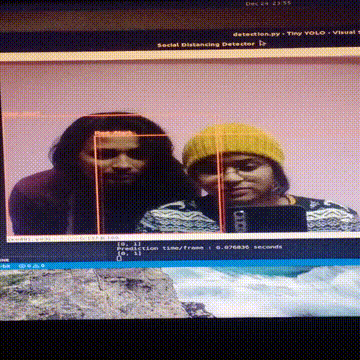

In [ ]:
#@title  Sample Output 
from IPython.display import Image
with open('/content/drive/MyDrive/Projects/Pedestrian_Detection/real-time.gif','rb') as f:
    display(Image(data=f.read(), format='png'))